<a href="https://colab.research.google.com/github/Deeptigupta00/recomendation_system/blob/main/deepti_gupta_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Movie Recommendation System **

In [1]:
import numpy as np
import pandas as pd

In [ ]:
movies = pd.read_csv('tmdb_5000_movies(1).csv')
crdt = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
crdt.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies.shape

(4803, 20)

In [ ]:
crdt.shape

(4803, 4)

In [ ]:
df= movies.merge(crdt,on='title')

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
df= df[['movie_id','title','overview','genres','keywords','cast','crew','popularity']]

In [ ]:
df.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,popularity
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",150.437577
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",139.082615


In [ ]:
import ast
#ast module helps Python applications to process trees of the Python abstract syntax grammar

In [ ]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L
# ast.literal_eval method is one of the helper functions that helps traverse an abstract syntax tree. This function evaluates an expression node or a string consisting of a Python literal

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['genres'] = df['genres'].apply(convert)

In [ ]:
df['keywords'] = df['keywords'].apply(convert)
df.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,popularity
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",150.437577
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",139.082615


In [ ]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [ ]:
df['cast'] = df['cast'].apply(convert)

In [ ]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [ ]:
df['crew'] = df['crew'].apply(fetch_director)

In [ ]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [ ]:
df['cast'] = df['cast'].apply(collapse)
df['crew'] = df['crew'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)
df['overview'] = df['overview'].apply(lambda x:x.split())

In [ ]:
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']
# combining overview,genres,key word, cast,crew in one single column

In [ ]:
new_df = df.drop(columns=['overview','genres','keywords','cast','crew'])
# removing unnecessary columns

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


In [ ]:
new_df

,movie_id,title,popularity,tags
546,211672,Minions,875.581305,"Minions Stuart, Kevin and Bob are recruited by..."
95,157336,Interstellar,724.247784,Interstellar chronicles the adventures of a gr...
788,293660,Deadpool,514.569956,Deadpool tells the origin story of former Spec...
94,118340,Guardians of the Galaxy,481.098624,"Light years from Earth, 26 years after being a..."
127,76341,Mad Max: Fury Road,434.278564,An apocalyptic story set in the furthest reach...
...,...,...,...,...
4631,426067,Midnight Cabaret,0.001389,A Broadway producer puts on a play with a Devi...
4125,325140,Hum To Mohabbat Karega,0.001186,"Raju, a waiter, is in love with the famous TV ..."
4733,65448,Penitentiary,0.001117,A hitchhiker named Martel Gordone gets in a fi...
3366,77156,Alien Zone,0.000372,A man who is having an affair with a married w...


**EXPLORTORY DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as mtp
import seaborn as sb

In [ ]:
x= new_df.iloc[:, [0,]].values
y= new_df.iloc[:, 2].values

<function matplotlib.pyplot.show(close=None, block=None)>

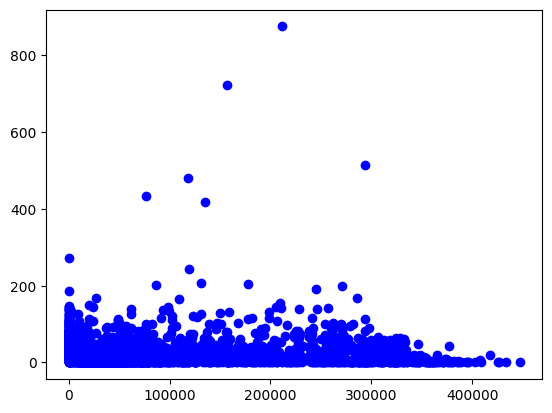

In [ ]:
mtp.scatter(x, y, c ="blue")
mtp.show

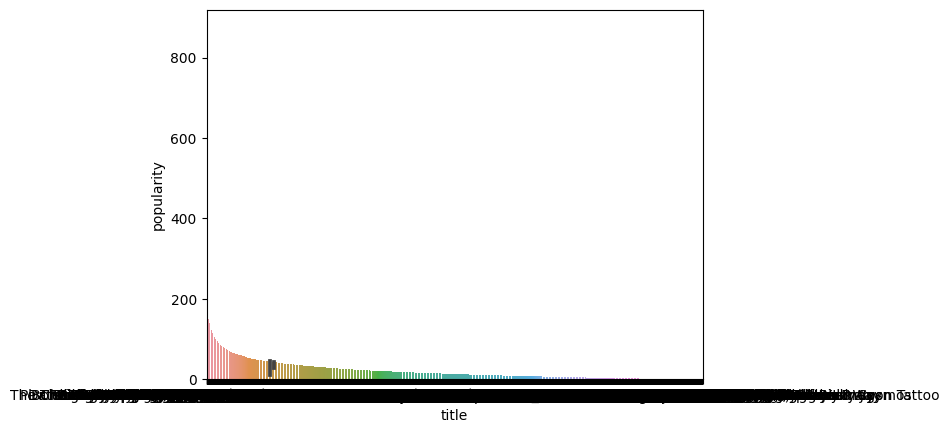

In [ ]:
sb.barplot(x = 'title',
            y = 'popularity',
            data = new_df)

# Show the plot
mtp.show()

**we are continuing building our model with count vecteriser, it is Effective in high dimensional spaces.in our data we have number of smple more than the dimensions**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
#CountVectorizer means breaking down a sentence or any text into words by performing preprocessing tasks like converting all words to lowercase, thus removing special characters

In [ ]:
vector = cv.fit_transform(new_df['tags']).toarray()
vector.shape

(4806, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#applying cosine similarity as it plot multi-dimensional space and determine how similar the data objects are irrespective of their size in the vectorspace

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
similarity
#it is in range 0-1 , 0 means completly distinct and as it move toward 1 the similarity factors increase

array([[1.        , 0.02668803, 0.12171612, ..., 0.        , 0.        ,
        0.03121953],
       [0.02668803, 1.        , 0.02192645, ..., 0.02279804, 0.02575131,
        0.        ],
       [0.12171612, 0.02192645, 1.        , ..., 0.02599376, 0.11744404,
        0.05129892],
       ...,
       [0.        , 0.02279804, 0.02599376, ..., 1.        , 0.03052813,
        0.        ],
       [0.        , 0.02575131, 0.11744404, ..., 0.03052813, 1.        ,
        0.06024752],
       [0.03121953, 0.        , 0.05129892, ..., 0.        , 0.06024752,
        1.        ]])

In [ ]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)


In [ ]:
recommend('Guardians of the Galaxy')

Batman v Superman: Dawn of Justice
Ong Bak 2
Superman II
Superman Returns
Superman IV: The Quest for Peace


In [ ]:
recommend('Avatar')

Despicable Me 2
The Croods
Penguins of Madagascar
The Master of Disguise
VeggieTales: The Pirates Who Don't Do Anything


In [ ]:
recommend('Madagascar')

Over the Hedge
Nicholas Nickleby
Another Year
Open Season
The Forest
